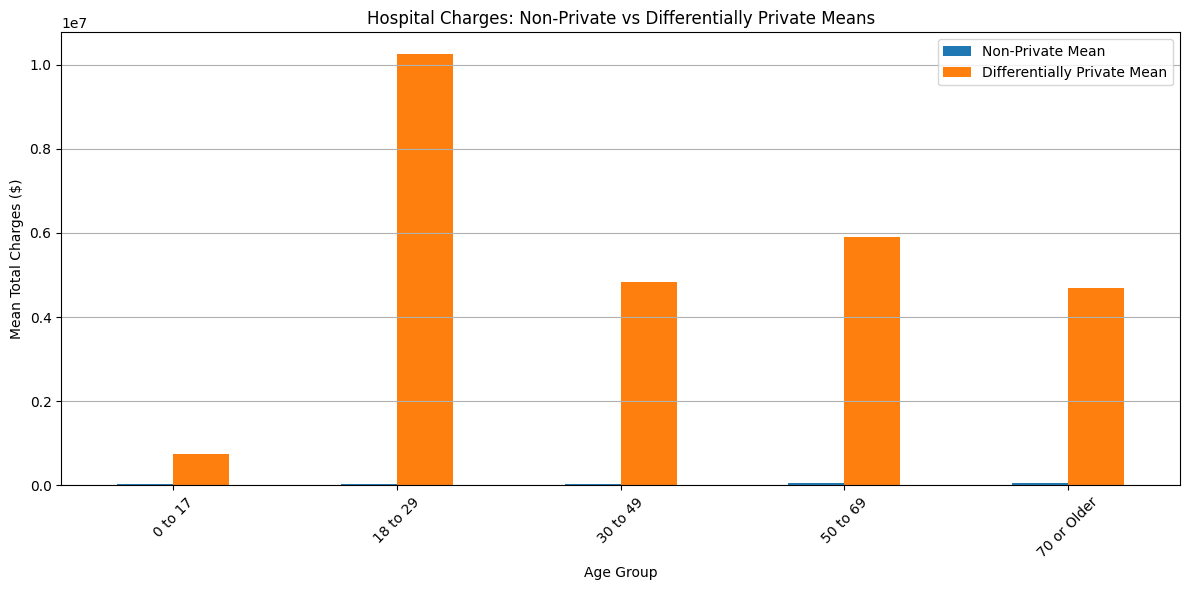


 Average accuracy loss due to differential privacy: $5239593.87
 Total execution time: 131.04 seconds



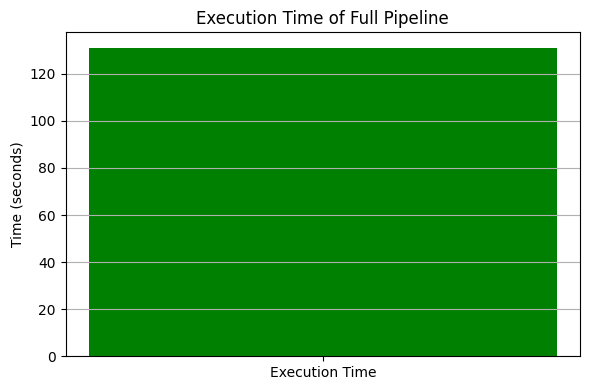

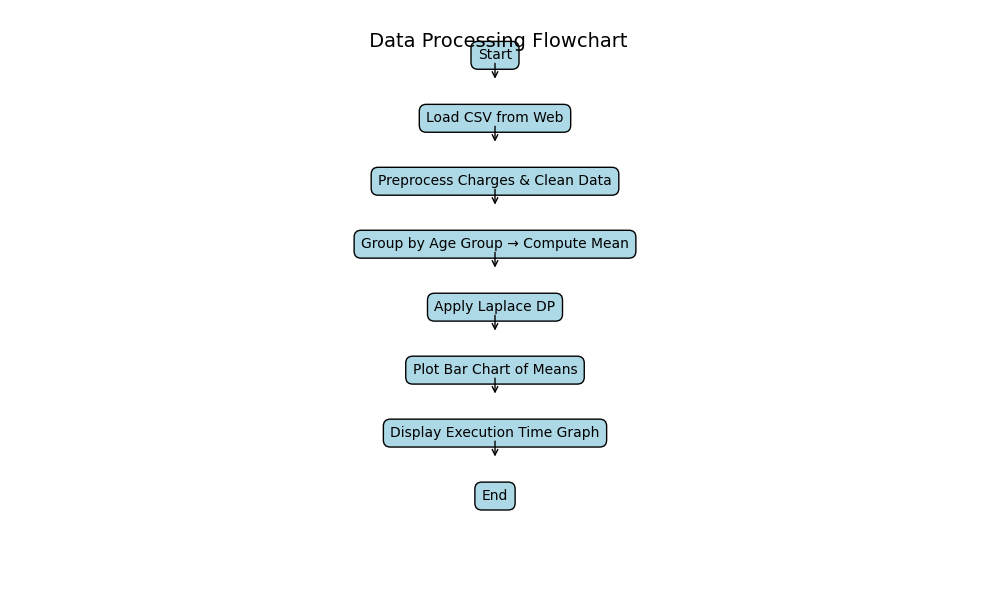

In [ ]:
# Install needed packages if not installed
# !pip install diffprivlib matplotlib pandas numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from diffprivlib.mechanisms import LaplaceBoundedDomain
import time

# Start timer
start_time = time.time()

# Step 1: Load dataset from online source
url = 'https://health.data.ny.gov/api/views/gnzp-ekau/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url, low_memory=False)

# Step 2: Data Preprocessing
data['Total Charges'] = data['Total Charges'].replace('[\$,]', '', regex=True).astype(float)
data = data.dropna(subset=['Total Charges', 'Age Group'])

# Step 3: Non-private mean
non_private_means = data.groupby('Age Group')['Total Charges'].mean()

# Step 4: Differential Privacy
epsilon = 1.0
lower_bound = data['Total Charges'].min()
upper_bound = data['Total Charges'].max()
sensitivity = upper_bound - lower_bound

dp_mech = LaplaceBoundedDomain(epsilon=epsilon, lower=lower_bound, upper=upper_bound, sensitivity=sensitivity)
dp_means = {}

for age_group in non_private_means.index:
    true_mean = non_private_means[age_group]
    dp_means[age_group] = dp_mech.randomise(true_mean)

dp_means_series = pd.Series(dp_means)

# Step 5: Plot comparison chart
plot_df = pd.DataFrame({
    'Non-Private Mean': non_private_means,
    'Differentially Private Mean': dp_means_series
})

plot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Hospital Charges: Non-Private vs Differentially Private Means')
plt.ylabel('Mean Total Charges ($)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 6: Accuracy and Time Report
accuracy_loss = abs(non_private_means - dp_means_series).mean()
execution_time = time.time() - start_time

print(f"\n Average accuracy loss due to differential privacy: ${accuracy_loss:.2f}")
print(f" Total execution time: {execution_time:.2f} seconds\n")

# Step 7: Time graph (execution time)
plt.figure(figsize=(6, 4))
plt.bar(['Execution Time'], [execution_time], color='green')
plt.title('Execution Time of Full Pipeline')
plt.ylabel('Time (seconds)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 8: Flowchart (with matplotlib)
def draw_flowchart():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    steps = [
        "Start",
        "Load CSV from Web",
        "Preprocess Charges & Clean Data",
        "Group by Age Group → Compute Mean",
        "Apply Laplace DP",
        "Plot Bar Chart of Means",
        "Display Execution Time Graph",
        "End"
    ]

    for i, step in enumerate(steps):
        y = 1 - i * 0.12
        ax.text(0.5, y, step, ha='center', va='center',
                bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))

    for i in range(len(steps) - 1):
        ax.annotate('', xy=(0.5, 1 - i * 0.12 - 0.05), xytext=(0.5, 1 - i * 0.12 - 0.01),
                    arrowprops=dict(arrowstyle='->', color='black'))

    plt.title("\n Data Processing Flowchart", fontsize=14)
    plt.tight_layout()
    plt.show()

draw_flowchart()